<a href="https://colab.research.google.com/github/meandevv/Project-Aerivia/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loadingthe Data.

In [ ]:
url = "https://docs.google.com/spreadsheets/d/1vnRFrl9wOQSO7q29OI0_kqnwfjt2yAmn/export?format=xlsx"
data = pd.read_excel(url)
data.head()

,Booking_ID,Destination,Travel_Month,Price_USD,Customer_Age,Booking_Date,Travel_Type,Payment_Method
0,e6b47fb5,London,January,1905.57,33,2023-08-17,Business,Credit Card
1,59319d69,Bangkok,February,1558.13,20,2023-01-31,Business,PayPal
2,30313de9,Tokyo,September,1584.64,53,2023-07-23,Leisure,PayPal
3,8c00aa9e,Toronto,October,839.84,18,2023-06-13,Leisure,Bank Transfer
4,a6ccb8e6,Dubai,March,695.22,66,2023-12-11,Business,Credit Card


In [ ]:
data.columns = data.columns.str.strip()
data.columns = data.columns.map(lambda x: x.replace("_", " "))
data = data.rename(columns = {
    'Price USD': 'Price (USD)',
})
data.columns.tolist()

['Booking ID',
 'Destination',
 'Travel Month',
 'Price (USD)',
 'Customer Age',
 'Booking Date',
 'Travel Type',
 'Payment Method']

# Cleaning the Data.

In [ ]:
data.isnull().sum()

,0
Booking ID,0
Destination,0
Travel Month,0
Price (USD),0
Customer Age,0
Booking Date,0
Travel Type,0
Payment Method,0


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Booking ID      300 non-null    object        
 1   Destination     300 non-null    object        
 2   Travel Month    300 non-null    object        
 3   Price (USD)     300 non-null    float64       
 4   Customer Age    300 non-null    int64         
 5   Booking Date    300 non-null    datetime64[ns]
 6   Travel Type     300 non-null    object        
 7   Payment Method  300 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 18.9+ KB


### Detecting Outliers.

#### Sorting the data in descending order:
- First, by Price.
- Then, by Age.

Using this sorting method to try and detect outliers.

In [ ]:
num_col = data.select_dtypes(include = np.number)
sorted = num_col.sort_values(by = num_col.columns.tolist(), ascending= False)
byPrice = data.sort_values(by = ['Price (USD)'], ascending = False)
byAge = data.sort_values(by = ['Customer Age'], ascending = False)
display(byPrice.head(10), byAge.head(10))

,Booking ID,Destination,Travel Month,Price (USD),Customer Age,Booking Date,Travel Type,Payment Method
34,4ffe3564,Paris,November,2498.35,18,2023-04-06,Business,PayPal
181,ffa4a53e,Paris,January,2496.75,43,2024-03-12,Business,Crypto
286,9739362b,New York,August,2490.73,47,2024-05-25,Leisure,Crypto
168,102197d1,Paris,May,2490.63,25,2023-04-10,Business,PayPal
251,99ec03fc,Bangkok,July,2474.98,52,2024-04-29,Leisure,Credit Card
154,e00822e3,Toronto,June,2471.60,37,2024-10-16,Leisure,Bank Transfer
141,58e2c5a4,Rome,April,2455.78,33,2024-08-08,Leisure,PayPal
258,9ab72ce0,Dubai,November,2454.06,21,2023-03-18,Leisure,Bank Transfer
51,266758de,New York,November,2453.54,28,2024-03-28,Leisure,Credit Card
111,3e23a903,Dubai,January,2440.88,53,2023-10-27,Business,Crypto


,Booking ID,Destination,Travel Month,Price (USD),Customer Age,Booking Date,Travel Type,Payment Method
255,f44e71e3,Cape Town,February,1190.40,70,2023-07-04,Leisure,Bank Transfer
123,b391721f,New York,May,1568.60,70,2024-08-05,Leisure,Crypto
186,fc024cd6,Toronto,April,1151.77,70,2024-04-09,Leisure,Crypto
173,6e53a830,Dubai,April,2426.88,70,2024-04-10,Business,PayPal
128,359ac2e4,New York,October,1202.54,70,2024-05-18,Business,Crypto
121,9741a7c9,Dubai,November,1556.52,69,2023-07-22,Leisure,Credit Card
29,cf3ee98d,Sydney,October,1287.14,68,2024-04-29,Leisure,PayPal
292,90db284c,New York,February,1105.98,68,2023-12-14,Leisure,PayPal
149,c27a2d4e,Dubai,January,305.78,68,2023-02-27,Leisure,Bank Transfer
36,7620baac,Paris,July,809.97,68,2024-04-10,Leisure,Crypto


#### Detecting Outliers using z-score method:

In [ ]:
zscore = (num_col - num_col.mean()) / num_col.std()
outlier = (zscore.abs() > 3).sum()
outlier_row = (outlier.any(axis = 0)).sum()
display(outlier, outlier_row)

,0
Price (USD),0
Customer Age,0


np.int64(0)

> The z-score method used in detecting outliers above shows that there're no Outliers in our data.

But to be extra sure, we'll be using IQR method as well.

#### Detecting Outliers using IQR method:

In [ ]:
IQR = (num_col.quantile(0.75) - num_col.quantile(0.25))
lwrBnd = (num_col.quantile(0.25) - 1.5) * IQR
uprBnd = (num_col.quantile(0.75) + 1.5) * IQR
numCol_row = num_col.any(axis = 1)

IQR_outlier = (num_col < lwrBnd) | (num_col > uprBnd)
display('Inter-quartile Range:', IQR, 'Lower Bound:', lwrBnd, 'Upper Bound:', uprBnd, 'Sum of outliers by IQR:', IQR_outlier.sum())

'Inter-quartile Range:'

,0
Price (USD),1113.965
Customer Age,24.000


'Lower Bound:'

,0
Price (USD),831953.6206
Customer Age,780.0000


'Upper Bound:'

,0
Price (USD),2.076214e+06
Customer Age,1.428000e+03


'Sum of outliers by IQR:'

,0
Price (USD),300
Customer Age,300


The IQR method used in detecting outliers shows that all the data points are outliers which is quite unusual. But also points to the fact that they have the same spread, which can as well be interpreted as no unusual points in the data = there're no outliers in our data.

#### Detecting Outliers using Box Plots:

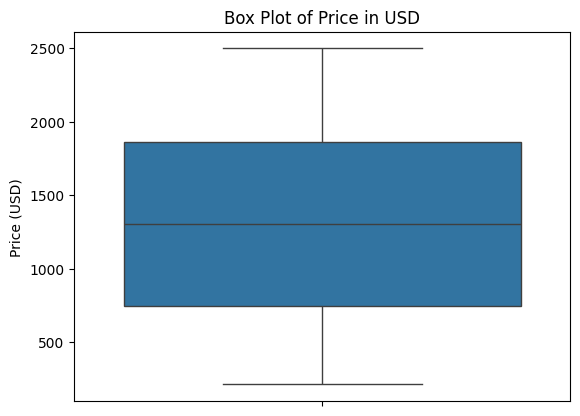

In [ ]:
sns.boxplot(data['Price (USD)'])
plt.title('Box Plot of Price in USD')
plt.show()

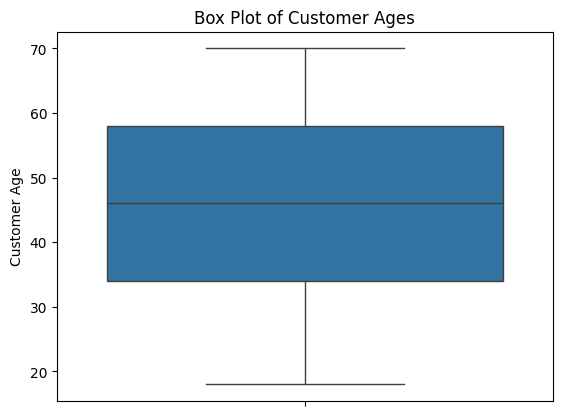

In [ ]:
sns.boxplot(data['Customer Age'])
plt.title('Box Plot of Customer Ages')
plt.show()

> The Box Plots above shows that there're no outliers in our data.
---
---

# EXPLORING THE DATASET

In [ ]:
data.columns.tolist()

['Booking ID',
 'Destination',
 'Travel Month',
 'Price (USD)',
 'Customer Age',
 'Booking Date',
 'Travel Type',
 'Payment Method']

We have a dataset that contains:
- Month - When people travel the most.
- Age - The Age group that travels the most and to where they travel to.
- Travel Type - What people travel for mostly and how this generates more revenue.
- Payment Method - How travellers pay and which one is mostly used.

Then we have the **DESTINATION**; This has to be the Categorical column.

Based on the travel dataset and the goal of building an airline app, the focus is to extract insights that will inform the design and development of the app.
We'll be working on understanding customer behavior, travel patterns, and preferences from the data.

Here's a breakdown of what we're expected to do and present:

- **Understand Customer Behavior**: Analyze customer demographics, travel frequency, preferred destinations, and booking habits. This will help the designers create user personas and tailor the app's features and user experience.
- **Identify Popular Travel Trends**: Determine the most popular destinations, travel months, and types of travel (business vs. leisure). This information is crucial for the developers to prioritize features and content within the app, such as highlighting popular destinations or suggesting peak travel times.
- **Analyze Booking and Payment Preferences**: Understand how customers book their travel and their preferred payment methods. This will guide the development of the booking and payment processing flows in the app, ensuring they are convenient and user-friendly.
- **Identify Opportunities for Personalization**: Look for patterns that can be used to personalize the app experience, such as suggesting destinations based on past travel or showing relevant deals.
- **Visualize Key Findings**: Present insights using clear and compelling visualizations. These visuals will help the designers and developers quickly grasp the key takeaways and make data-driven decisions.

This analysis will provide the foundational understanding of the target audience and their travel needs, enabling the team to build an app that is both user-centric and commercially successful.

---
---
# Analysis
---

### 1. Bookings per Destination and Month

#### Bookings per Destination:

This bar plot shows the total number of bookings for each destination in the dataset. It allows us to quickly identify the most and least popular travel destinations among customers.

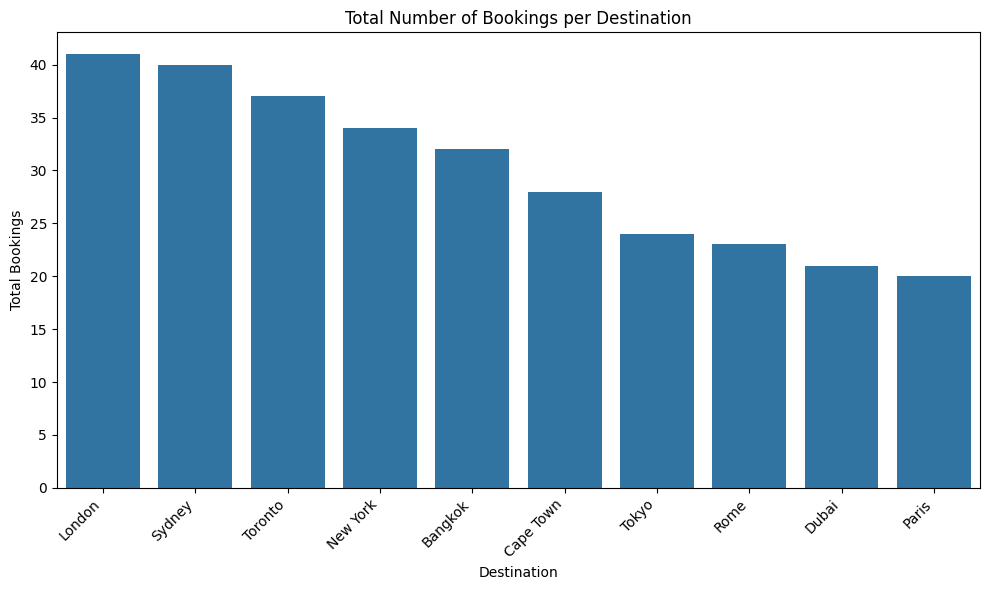

In [ ]:
destination_counts = data['Destination'].value_counts().reset_index(name='Destination Bookings')
destination_counts = destination_counts.rename(columns={'index': 'Destination'})

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 6))
sns.barplot(x='Destination', y='Destination Bookings', data=destination_counts)
plt.title('Total Number of Bookings per Destination')
plt.xlabel('Destination')
plt.ylabel('Total Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

> This Plot shows London, Sydney, and Toronto to be the top destinations travelled.

#### Bookings per Month:

This bar plot illustrates the total number of bookings made in each month of the year. It helps in understanding seasonal travel trends and identifying peak travel months.

,Travel Month,Monthly Bookings
0,February,38
1,May,28
2,November,28
3,January,27
4,April,25
5,December,24
6,August,24
7,September,23
8,July,22
9,June,22


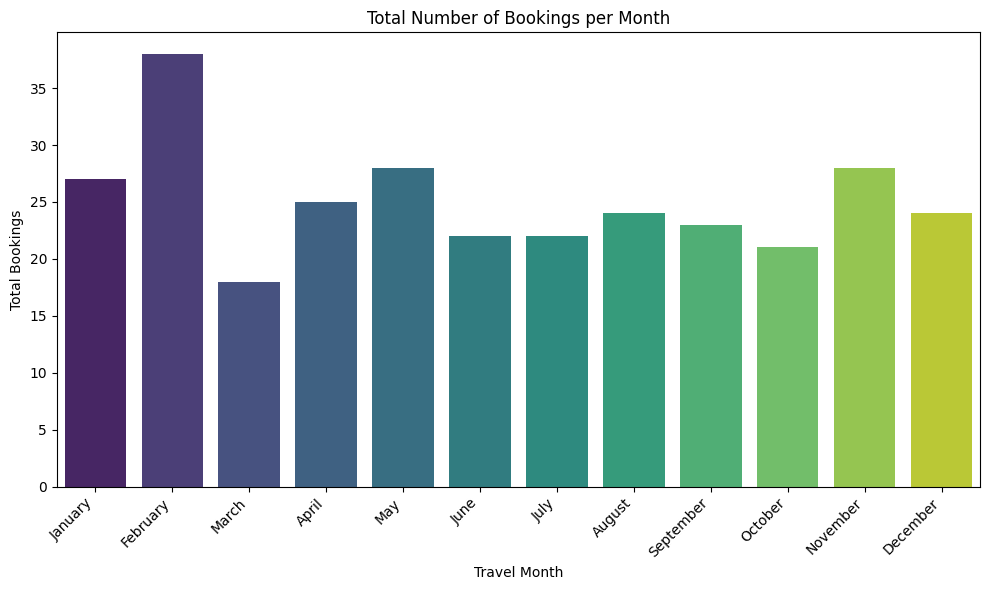

In [ ]:
monthly_counts = data['Travel Month'].value_counts().reset_index(name='Monthly Bookings')
monthly_counts = monthly_counts.rename(columns={'index': 'Travel Month'})


travelTrend = data.groupby(['Travel Month', 'Destination']).size().reset_index(name = 'Count')
display(monthly_counts.sort_values(by = 'Monthly Bookings', ascending = False))

# Define the order of months for correct plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_counts['Travel Month'] = pd.Categorical(monthly_counts['Travel Month'], categories=month_order, ordered=True)
monthly_counts = monthly_counts.sort_values('Travel Month')


plt.figure(figsize=(10, 6))
sns.barplot(x='Travel Month', y='Monthly Bookings', data=monthly_counts, palette='viridis', hue='Travel Month', legend=False)
plt.title('Total Number of Bookings per Month')
plt.xlabel('Travel Month')
plt.ylabel('Total Bookings')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

> **Insights: Bookings per Destination and Month**
*   **Popular Destinations:** The bar plot of bookings per destination clearly shows which cities are the most popular among travelers in this dataset. London, Sydney, and Toronto appear to be the top destinations.
*   **Seasonal Trends:** The bar plot of bookings per month highlights the months with the highest and lowest travel activity. February seems to be the busiest month for travel, while March has the fewest bookings.

---
### 2. Bookings by Age Group Distribution.

#### Number of Travels by Age Group:

This line plot displays the number of travels for different age groups. It provides insights into which age demographics travel the most and can help in tailoring marketing efforts and app features to specific age segments.

> We can use pd.cut( ) to create age groups and then group by those groups and destination to see the counts. I will modify the selected cell to do this.

,Customer Age,Destination,Travel Count
228,70,Dubai,1
229,70,New York,2
230,70,Toronto,1
227,70,Cape Town,1
226,69,Dubai,1
...,...,...,...
3,19,Bangkok,1
6,19,London,1
2,18,Toronto,1
0,18,Paris,1


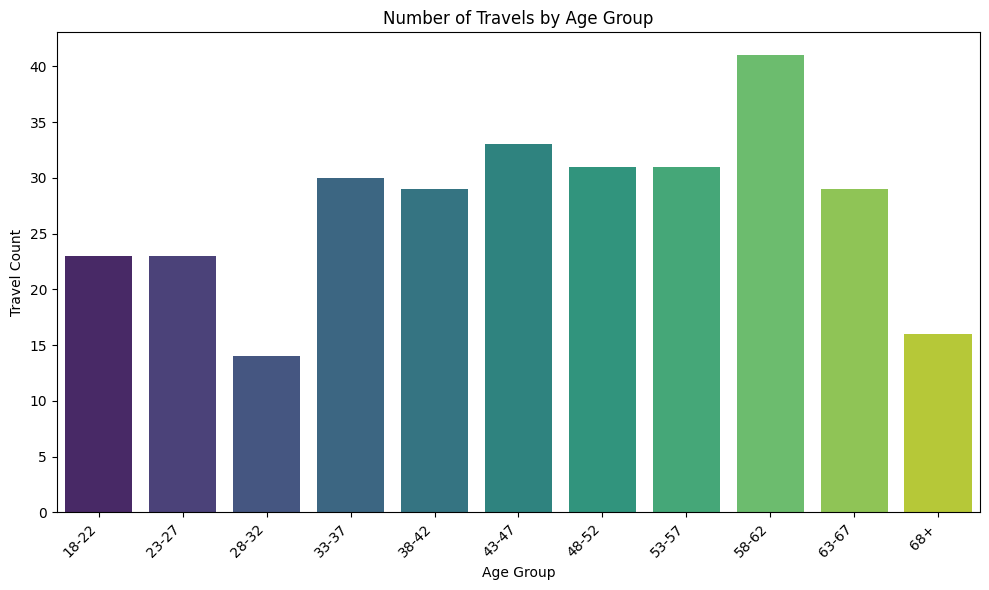

In [ ]:
data['Age Group'] = pd.cut(data['Customer Age'], bins=[18, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 100],
                             labels=['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52', '53-57', '58-62', '63-67', '68+'], right=False)
age_group_counts = data['Age Group'].value_counts()

# Show table of Destination by Age Group
ageGroup = data.groupby(['Customer Age', 'Destination']).size().reset_index(name = 'Travel Count')
display(ageGroup.sort_values(by = 'Customer Age', ascending = False))


plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', data=data, palette='viridis', hue='Age Group', legend=False)
plt.title('Number of Travels by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Travel Count')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

> This shows that the **58-62** age group has the highest number of travels.

#### Distribution of Customer Age & Preferred Destinations by Age Group:

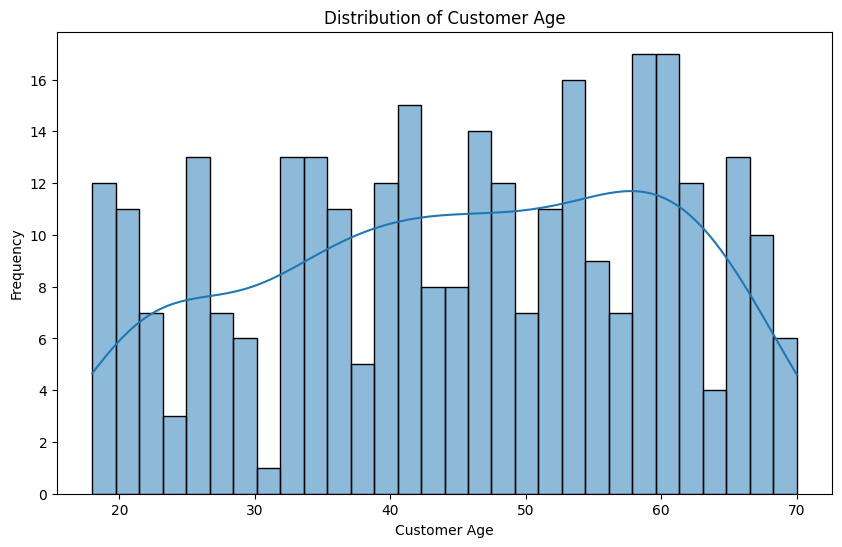

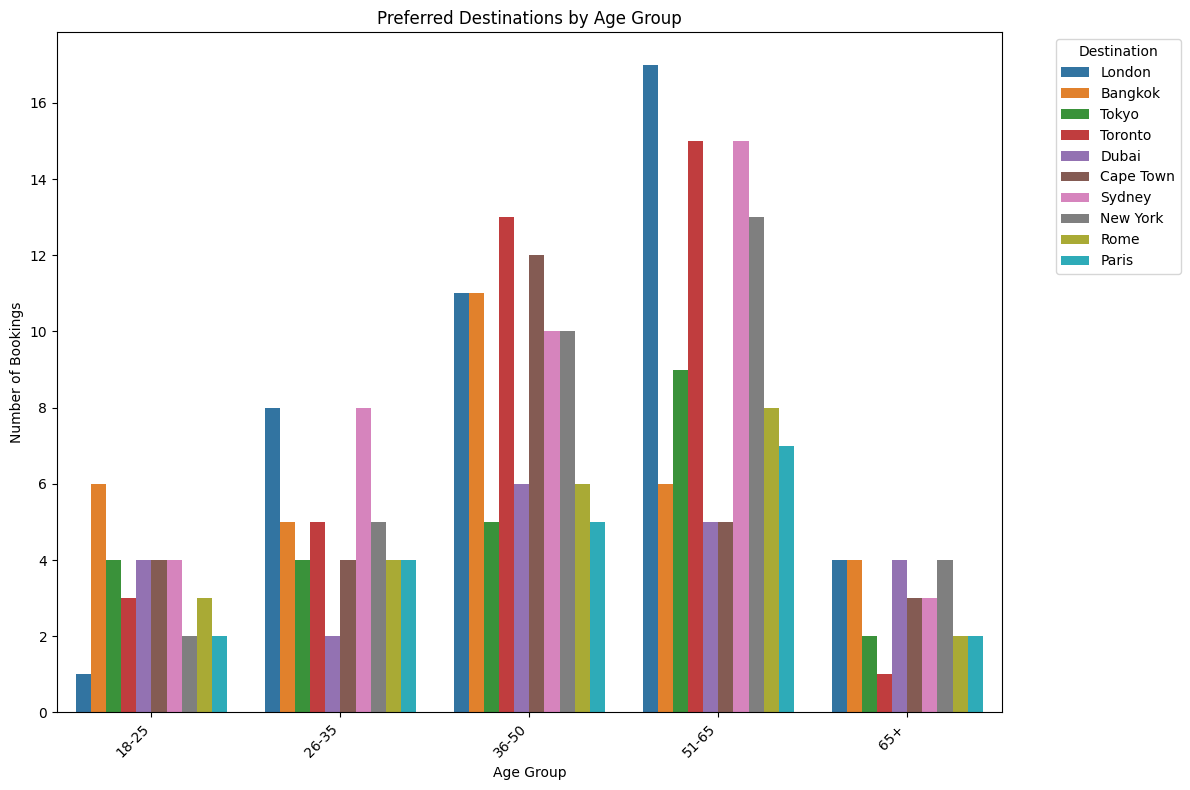

In [ ]:
# Analyze the distribution of customer age
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Age'], bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

# Explore preferred destinations by age group (example: splitting into age groups)
data['Age Group'] = pd.cut(data['Customer Age'], bins=[18, 25, 35, 50, 65, 100],
                             labels=['18-25', '26-35', '36-50', '51-65', '65+'], right=False)

# Analyze the distribution of customer age across destination
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='Age Group', hue='Destination')
plt.title('Preferred Destinations by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- The first plot is a histogram showing the distribution of customer ages, giving an overview of the age range of the customer base.
- The second plot is a grouped bar chart showing the preferred destinations for different age groups. This helps in understanding age-specific travel preferences and can inform targeted promotions and destination recommendations within the app.

> **Insights: Bookings by Age Group Distribution.**
*   **Age Group Distribution:** The count plot of travels by age group and the histogram of customer age distribution show the age range of the customers and which age groups travel the most. The 58-62 age group appears to have the highest number of travels.
*   **Age Group Preferences:** The grouped bar chart of preferred destinations by age group reveals that different age groups have varying preferences for destinations. This insight can be valuable for targeted marketing.

---
## 3. Bookings by Travel Type.

This bar plot shows the distribution of travel types (Business vs. Leisure). It provides a clear picture of whether the customer base primarily travels for business or leisure, which is important for designing app features and content relevant to each travel type.

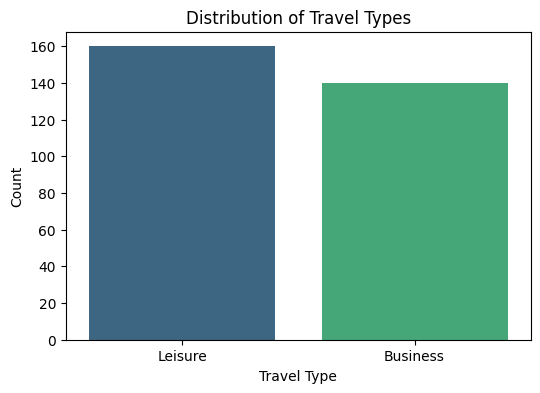

In [ ]:
travel_type_counts = data['Travel Type'].value_counts().reset_index()
travel_type_counts.columns = ['Travel Type', 'Count']

plt.figure(figsize=(6, 4))
sns.barplot(x='Travel Type', y='Count', data=travel_type_counts, palette='viridis', hue='Travel Type', legend=False)
plt.title('Distribution of Travel Types')
plt.xlabel('Travel Type')
plt.ylabel('Count')
plt.show()

> This shows that Customers travel more for Leisure than Business.


#### Bookings by Travel Type across Monthly trends:

This multi-line plot shows the monthly trends for both business and leisure travel. It helps in understanding the seasonality of each travel type and can inform strategies for promoting business or leisure travel during specific times of the year.

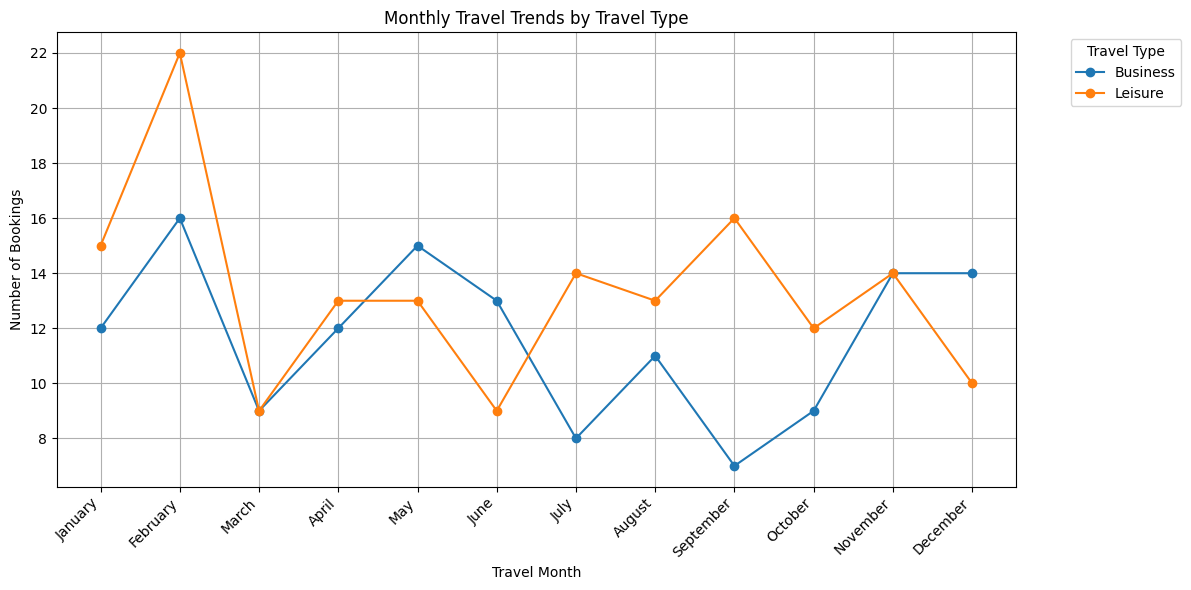

In [ ]:
monthly_travel_type_counts = data.groupby(['Travel Month', 'Travel Type'], observed=False).size().reset_index(name='Count')

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_travel_type_counts['Travel Month'] = pd.Categorical(monthly_travel_type_counts['Travel Month'], categories=month_order, ordered=True)
monthly_travel_type_counts = monthly_travel_type_counts.sort_values('Travel Month')

# Pivot the data for line plotting
plot_data = monthly_travel_type_counts.pivot(index='Travel Month', columns='Travel Type', values='Count').fillna(0)
plot_data = plot_data.reindex(month_order)

plt.figure(figsize=(12, 6))
for column in plot_data.columns:
    plt.plot(plot_data.index, plot_data[column], marker='o', linestyle='-', label=column)

plt.title('Monthly Travel Trends by Travel Type')
plt.xlabel('Travel Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Travel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

> **Overall Trends:** Both business and leisure travel show variations throughout the year.
- **Peak Months:** February appears to be a peak month for leisure travel, while business travel seems to have a few peaks throughout the year, including February and November.
- **Low Months:** March seems to be a low month for both business and leisure travel.
- **Relative Popularity:** Throughout most of the year, leisure travel appears to have a slightly higher number of bookings compared to business travel, although there are months where business bookings are comparable or slightly higher.


#### Bookings by Travel Type across Age Group:

This grouped bar chart displays the distribution of travel types across different age groups. It reveals whether certain age groups tend to travel more for business or leisure, allowing for more targeted marketing and personalized app experiences based on age and travel purpose.

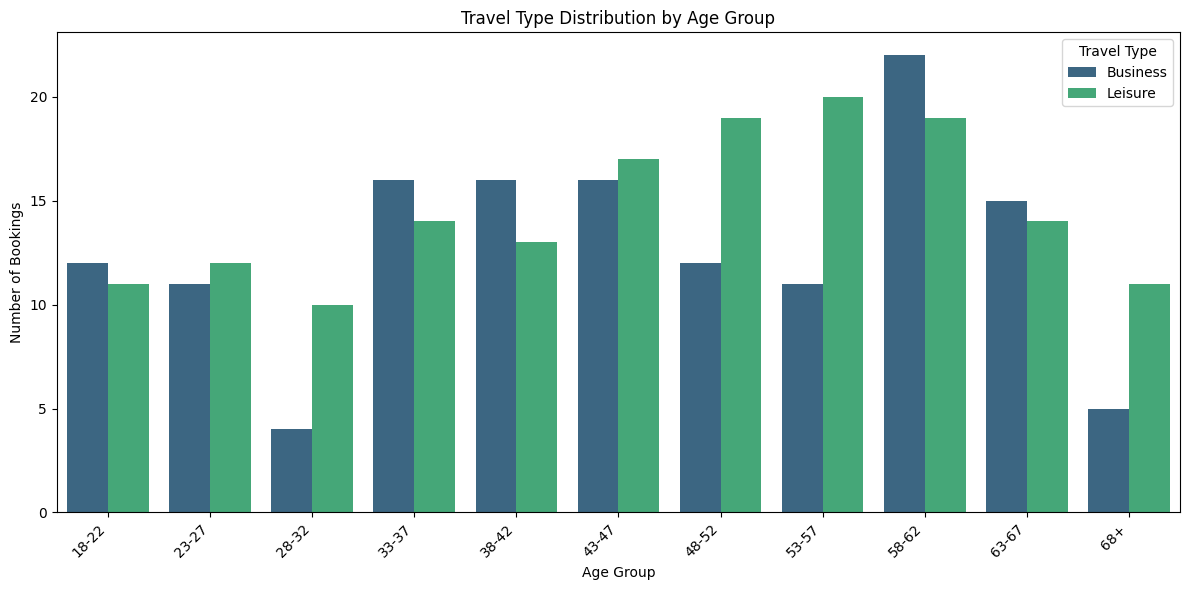

In [ ]:
data['Age Group'] = pd.cut(data['Customer Age'], bins=[18, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 100],
                             labels=['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52', '53-57', '58-62', '63-67', '68+'], right=False)

age_group_travel_type_counts = data.groupby(['Age Group', 'Travel Type'], observed=False).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Count', hue='Travel Type', data=age_group_travel_type_counts, palette='viridis')
plt.title('Travel Type Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

> **Insights: Bookings by Travel Type**
*   **Travel Type Distribution:** The bar plot of the distribution of travel types shows whether business or leisure travel is more prevalent in the dataset. Leisure travel is slightly more common than business travel.
*   **Monthly Travel Type Trends:** The multi-line plot of monthly travel trends by travel type illustrates the seasonality of business and leisure travel. This can help in understanding peak seasons for each travel type.
*   **Travel Type by Age Group:** The grouped bar chart of travel type distribution by age group shows how business and leisure travel are distributed across different age segments.

---
### 4. Bookings by Payment Method.

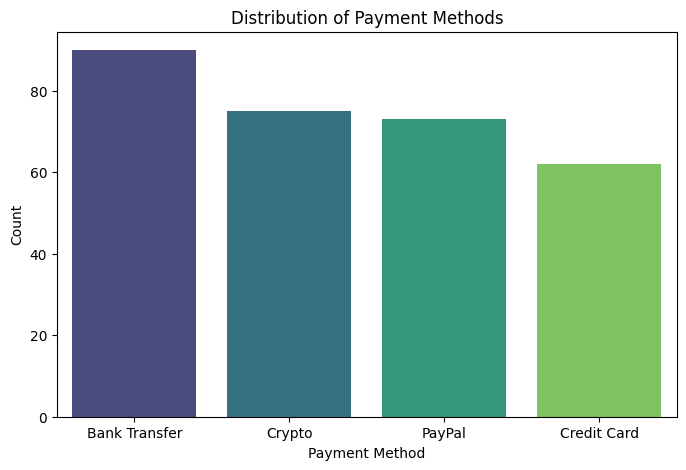

In [ ]:
payment_method_counts = data['Payment Method'].value_counts().reset_index()
payment_method_counts.columns = ['Payment Method', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(x='Payment Method', y='Count', data=payment_method_counts, palette='viridis', hue='Payment Method', legend=False)
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

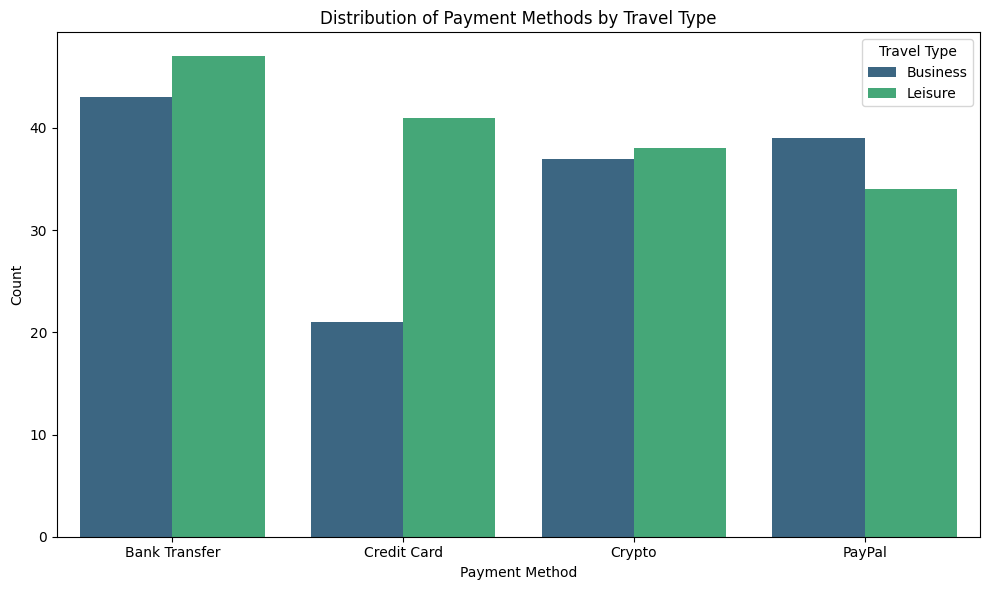

In [ ]:
payment_method_travel_type = data.groupby(['Payment Method', 'Travel Type']).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Payment Method', y='Count', hue='Travel Type', data=payment_method_travel_type, palette='viridis')
plt.title('Distribution of Payment Methods by Travel Type')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

> Bank Transfer, Paypal, and Crypto are more popular for business travel, while Credit Card and PayPal are more popular for leisure travel. Although Bank Transfer also shows high usage in leisure travel as well.

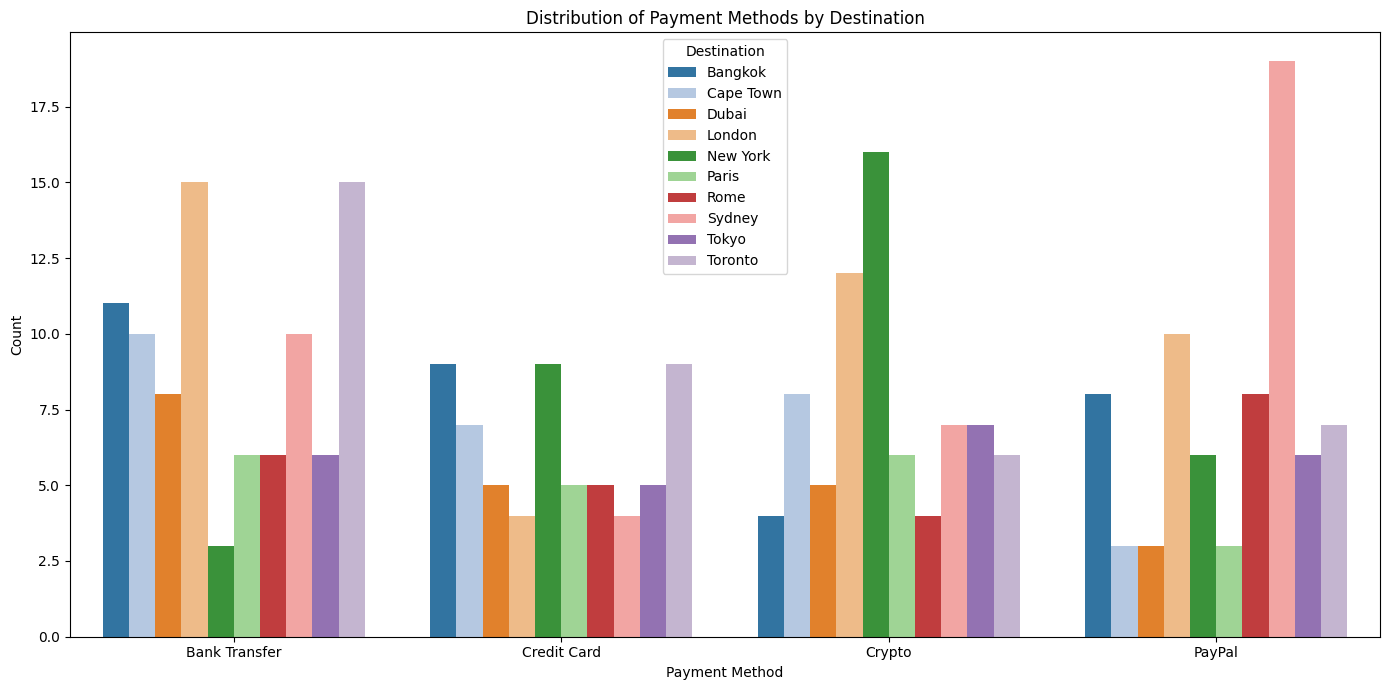

In [ ]:
payment_method_destination = data.groupby(['Payment Method', 'Destination']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.barplot(x='Payment Method', y='Count', hue='Destination', data=payment_method_destination, palette='tab20')
plt.title('Distribution of Payment Methods by Destination')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

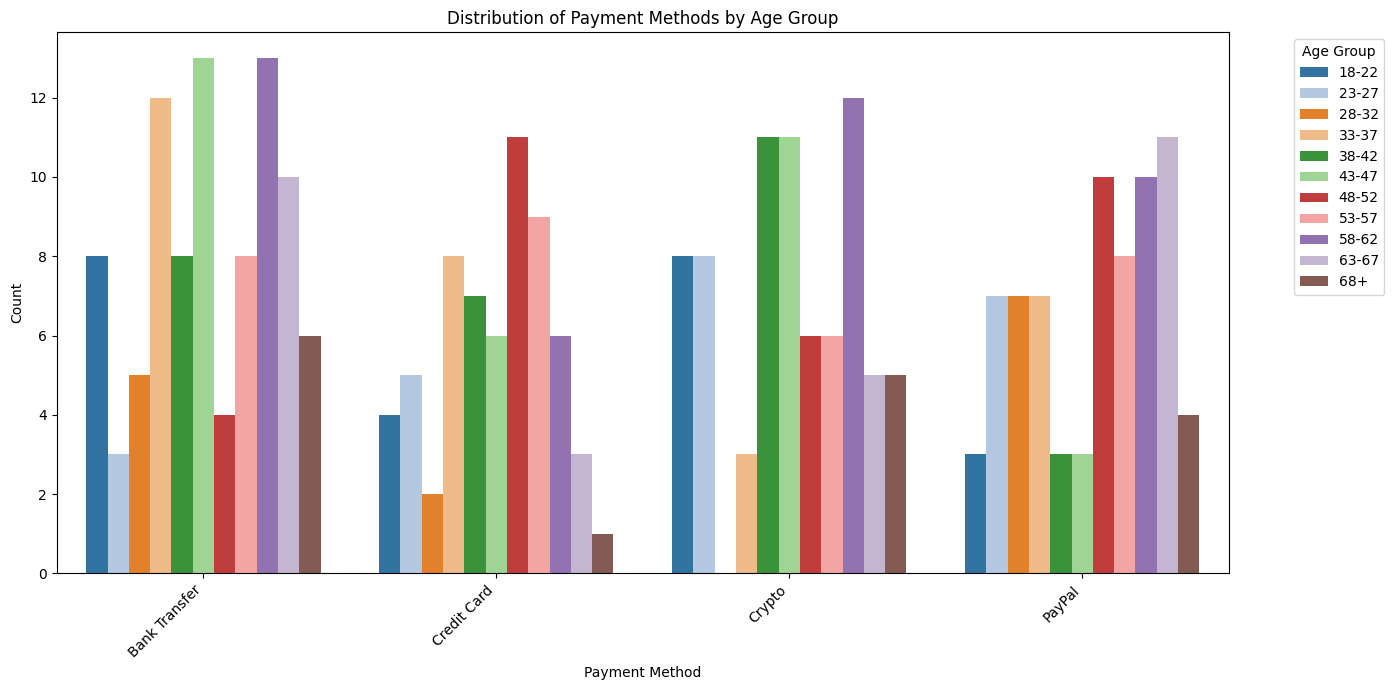

In [ ]:
payment_method_age_group = data.groupby(['Payment Method', 'Age Group'], observed=False).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.barplot(x='Payment Method', y='Count', hue='Age Group', data=payment_method_age_group, palette='tab20')
plt.title('Distribution of Payment Methods by Age Group')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

> **Insights: Bookings by Payment Method**

*   **Payment Method Distribution:** The bar plot of the distribution of payment methods indicates the most frequently used payment methods. Bank Transfer, Crypto, and PayPal are the most common payment methods.
*   **Payment Method by Travel Type, Destination, and Age Group:** The grouped bar charts exploring payment methods by travel type, destination, and age group provide insights into whether certain payment methods are preferred for specific travel types, destinations, or by particular age groups. For example, Bank Transfer and Paypal are more popular for business travel, while Credit Card and PayPal are more popular for leisure travel.
---
---

# Summary of Analysis for App Development.

Based on the analysis of the travel dataset, here's a summary of key findings that can inform the design and development of the app:

*   **Target Audience:** The data suggests a diverse age range of travelers, with the 58-62 age group showing the highest travel frequency. The app should cater to different age segments with appropriate features and user interfaces.
*   **Popular Destinations and Seasons:** London, Sydney, and Toronto are the most popular destinations, with February being the peak travel month and March the lowest. The app can highlight popular destinations, offer seasonal promotions, and provide insights into peak travel times.
*   **Travel Type Preferences:** Both leisure and business travel are significant, with leisure being slightly more common. The app should support features relevant to both travel types, such as business travel profiles, expense reporting, and leisure activity recommendations.
*   **Age-Specific Preferences:** Different age groups show varying preferences for destinations and potentially travel types. The app can leverage this by offering personalized recommendations and targeted deals based on user age and past travel behavior.
*   **Payment Method Trends:** Bank Transfer, Crypto, and PayPal are the most frequently used payment methods. The app should prioritize seamless integration with these payment options and potentially explore other popular methods based on the target market.
*   **Relationship between Factors:** The analysis of payment methods by travel type, destination, and age group reveals interesting correlations. For instance, certain payment methods are more popular for business travel or specific destinations. This can inform payment options presented to users based on their travel details.

By incorporating these insights into the app's design, features, and marketing, we can create a more user-centric and successful product that meets the needs and preferences the target audience.

# Thank you!